### 지도학습 - knn

* 지도학습은 대표적인 머신러닝 방법론 중의 하나
* 지도학습은 입력과 출력 생플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용.
* 지도학습에는 두 가지 종류 분류(classification)-범주형, 회귀(regression)-수치형이 있다.
* knn은 사용자가 쉽게 이해할 수 있는 대표적인 지도학습 방법 중 하나로. 분류와 회귀에 다 사용된다.

In [4]:
# 한글 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=727667a764868afcf1134b24d786623681d625a2a26af11b44adaea1931ae50d
  Stored in directory: c:\users\jongho\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [6]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

### knn의 k가 1인 경우의 알고리즘(회귀-수치형 값의 예측)

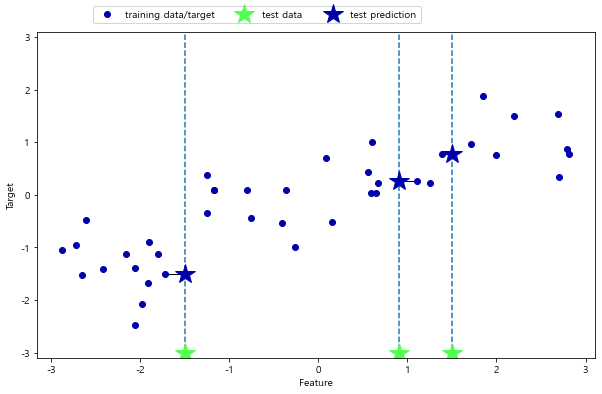

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

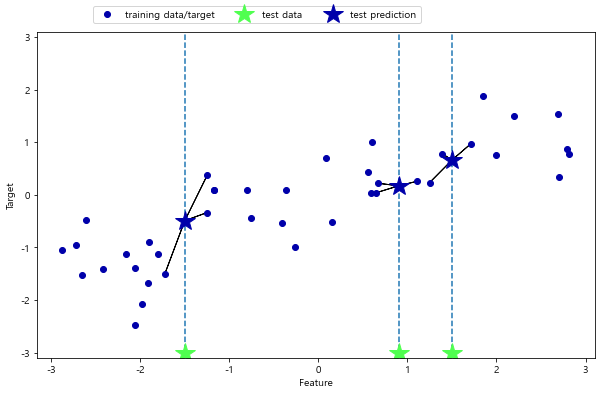

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

C:\Users\Jongho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


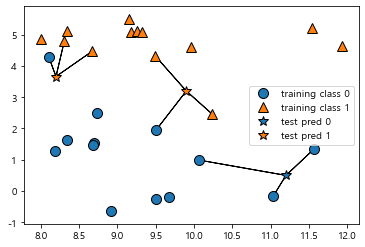

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\Jongho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


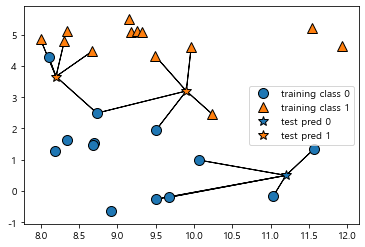

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

### 하이퍼 파라미터 k에 따른 결정경계

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [17]:
X, y = mglearn.datasets.make_forge()

C:\Users\Jongho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [19]:
X.shape

(26, 2)

In [20]:
y.shape

(26,)

In [23]:
X[0:10] #numpy는 slicing 개념으로 접근

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059]])

In [24]:
X[0:10], y[0:10]

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1]))

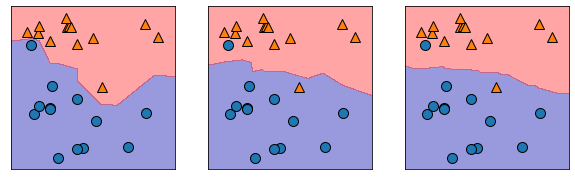

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
# 1행 3열에 크기는 10, 3인 그래프를 그려서

clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)

mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                ax=axes[0], alpha=.4)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])

clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)

mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                ax=axes[1], alpha=.4)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])

clf = KNeighborsClassifier(n_neighbors=9).fit(X, y)

mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                ax=axes[2], alpha=.4)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[2])

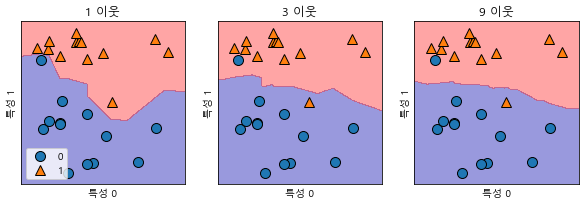

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### 유방암 데이터 셋

In [29]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [30]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 행열 : (569, 30)


### feature 이름, class 이름

In [31]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


### 실습
 * 01 데이터 나누기
 * 02 knn 모델 만들기
 * 03 모델 평가하기
 * 04 모델 개선하기

In [53]:
# 5-1-1 데이터 나누기

from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y, 
                                                    random_state = 0)

In [54]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 
y_train_1 = (y_train == 1).sum()
y_train_0 = len(y_train) - (y_train == 1).sum()

y_test_1 = (y_test == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print( "y_train y_test => 1의 개수, 1의 개수", y_train_1, y_test_1 )
print( "y_train y_test => 0의 개수, 0의 개수", y_train_0, y_test_0)

## target의 확인
print( "1: y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_1, y_test_1,
                                            y_train_1/y_1_all, y_test_1/y_1_all) )

print( "0 :y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_0, y_test_0,
                                            y_train_0/y_0_all, y_test_0/y_0_all) )

512
y_train y_test => 1의 개수, 1의 개수 321 36
y_train y_test => 0의 개수, 0의 개수 191 21
1: y_train:321, y_test:36, 비율 0.8991596638655462, 0.10084033613445378
0 :y_train:191, y_test:21, 비율 0.9009433962264151, 0.09905660377358491


In [119]:
# 5-1-2 knn 모델 만들기
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([2, 2, 3, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2], dtype=int64)

In [70]:
# 5-1-3 모델 평가하기
(pred == y_test).sum()/(len(pred))

0.631578947368421

In [71]:
### 좋은 k를 찾기

good_k = 999  # 좋은 k 찾기
acc = 0       # 정확도
for i in range(1,500,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    if acc < np.mean(pred==y_test):
        good_k = i                  # k값 업데이트
        acc = np.mean(pred==y_test) # 정확도 업데이트
        print(i, np.mean(pred==y_test))

1 0.9298245614035088


### score를 이용한 결과 확인
 * 정확도
 * 결정계수

In [72]:
# 정확도 구하기
(pred == y_test).sum()/(len(pred))

0.631578947368421

In [73]:
acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
acc_tr, acc_test

(0.953125, 0.9298245614035088)

In [82]:
# 5-1-1 데이터 나누기

from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y, 
                                                    random_state = 0)

In [83]:
tr_acc = []
test_acc = []
k_nums = range(1,22,2) # 1, 3, 5

for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도
    acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
    acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
    
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
#     print('k = ',n,f'score: {acc_tr}, score:{ acc_test}')
    print("k = %2d  score : %10f, score: %10f" % (n, acc_tr, acc_test) )

k =  1  score :   1.000000, score:   0.916084
k =  3  score :   0.957746, score:   0.916084
k =  5  score :   0.946009, score:   0.916084
k =  7  score :   0.946009, score:   0.923077
k =  9  score :   0.943662, score:   0.916084
k = 11  score :   0.938967, score:   0.916084
k = 13  score :   0.941315, score:   0.909091
k = 15  score :   0.938967, score:   0.923077
k = 17  score :   0.936620, score:   0.930070
k = 19  score :   0.938967, score:   0.930070
k = 21  score :   0.936620, score:   0.923077


In [84]:
import seaborn as sns
dat = {'tr_acc': tr_acc, 'test_acc':test_acc}
dat_df = pd.DataFrame(dat, index=range(1,22,2))
dat_df

,tr_acc,test_acc
1,1.000000,0.916084
3,0.957746,0.916084
5,0.946009,0.916084
7,0.946009,0.923077
9,0.943662,0.916084
11,0.938967,0.916084
13,0.941315,0.909091
15,0.938967,0.923077
17,0.936620,0.930070
19,0.938967,0.930070


<AxesSubplot:>

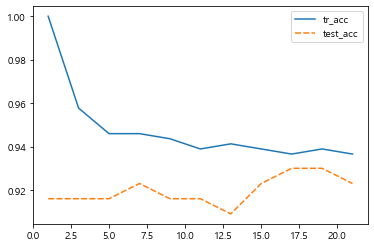

In [85]:
sns.lineplot(data=dat_df)

In [ ]:
# 6-3 (추가) tips 데이터 셋에 대해서 학습용 점수, 테스트 점수를 그래프로 그려보자.
 * total_bill, tip,  y=>size
 * 적절한 k를 찾고, 점수(학습용, 테스트용)를 선그래프로 그려보기.

In [87]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [90]:
from sklearn.model_selection import train_test_split

sel = ['total_bill','tip']
X = tips[sel]
y = tips['size']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y, 
                                                    random_state = 0)

In [115]:
tr_acc = []
test_acc = []
k_nums = range(1,20,1)

# 모델 선택 및 확습

for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기
    acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
    acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
    
    # 정확도 값 저장
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
#     print('k = ',n,f'score: {acc_tr}, score:{ acc_test}')
#     print("k = %2d  score : %10f, score: %10f" % (n, acc_tr, acc_test) )
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )
    print("정확도 차이 {:.3f}".format(acc_tr-acc_test))

k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.541
정확도 차이 0.459
k :  2
학습용셋 정확도 0.781
테스트용셋 정확도 0.574
정확도 차이 0.208
k :  3
학습용셋 정확도 0.754
테스트용셋 정확도 0.623
정확도 차이 0.131
k :  4
학습용셋 정확도 0.732
테스트용셋 정확도 0.639
정확도 차이 0.093
k :  5
학습용셋 정확도 0.743
테스트용셋 정확도 0.689
정확도 차이 0.055
k :  6
학습용셋 정확도 0.710
테스트용셋 정확도 0.672
정확도 차이 0.038
k :  7
학습용셋 정확도 0.683
테스트용셋 정확도 0.705
정확도 차이 -0.022
k :  8
학습용셋 정확도 0.678
테스트용셋 정확도 0.705
정확도 차이 -0.027
k :  9
학습용셋 정확도 0.694
테스트용셋 정확도 0.672
정확도 차이 0.022
k :  10
학습용셋 정확도 0.683
테스트용셋 정확도 0.672
정확도 차이 0.011
k :  11
학습용셋 정확도 0.694
테스트용셋 정확도 0.672
정확도 차이 0.022
k :  12
학습용셋 정확도 0.694
테스트용셋 정확도 0.672
정확도 차이 0.022
k :  13
학습용셋 정확도 0.683
테스트용셋 정확도 0.672
정확도 차이 0.011
k :  14
학습용셋 정확도 0.683
테스트용셋 정확도 0.689
정확도 차이 -0.005
k :  15
학습용셋 정확도 0.689
테스트용셋 정확도 0.672
정확도 차이 0.016
k :  16
학습용셋 정확도 0.683
테스트용셋 정확도 0.689
정확도 차이 -0.005
k :  17
학습용셋 정확도 0.678
테스트용셋 정확도 0.672
정확도 차이 0.005
k :  18
학습용셋 정확도 0.678
테스트용셋 정확도 0.689
정확도 차이 -0.011
k :  19
학습용셋 정확도 0.678
테스트용셋 정확도 0.672
정확도 차이 0.005


In [116]:
import seaborn as sns
dat = {'tr_acc': tr_acc, 'test_acc':test_acc}
dat_df = pd.DataFrame(dat, index=range(1,20,1))
dat_df

,tr_acc,test_acc
1,1.000000,0.540984
2,0.781421,0.573770
3,0.754098,0.622951
4,0.732240,0.639344
5,0.743169,0.688525
6,0.710383,0.672131
7,0.683060,0.704918
8,0.677596,0.704918
9,0.693989,0.672131
10,0.683060,0.672131


<AxesSubplot:>

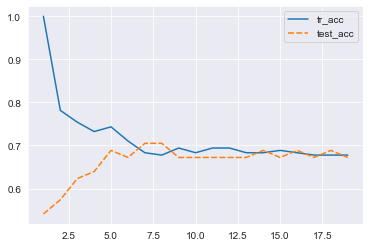

In [117]:
sns.set_style("darkgrid")
sns.lineplot(data=dat_df, palette='tab10')